# Data in Motion: Data Analysis Chllenge Week 1

#### importing dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

crime_data = pd.read_csv("MD_Crime_Data.csv")

In [2]:
crime_data

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Worcester County,2016,51255,3,17,39,93,289,1514,32,...,563.8,2953.9,62.4,201.8,14.0,45.3,-8.3,6.5,-2.5,15.0
1100,Worcester County,2017,51408,2,26,43,106,220,1514,39,...,427.9,2945.1,75.9,-33.5,52.5,9.9,13.6,-24.1,-0.3,21.5
1101,Worcester County,2018,51304,0,12,24,88,215,1178,34,...,419.1,2296.1,66.3,-100.0,-53.8,-44.1,-16.8,-2.1,-22.0,-12.6
1102,Worcester County,2019,51606,0,12,24,94,186,1086,30,...,360.4,2104.4,58.1,0.0,-0.6,-0.6,6.2,-14.0,-8.3,-12.3


In [3]:
###checking the columns

crime_data.columns  

Index(['JURISDICTION', 'YEAR', 'POPULATION', 'MURDER', 'RAPE', 'ROBBERY',
       'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT', 'GRAND TOTAL',
       'PERCENT CHANGE', 'VIOLENT CRIME TOTAL', 'VIOLENT CRIME PERCENT',
       'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS',
       'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE',
       'OVERALL CRIME RATE PER 100,000 PEOPLE',
       'OVERALL PERCENT CHANGE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'PROPERTY CRIME RATE PER 100,000 PEOPLE',
       'PROPERTY CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'MURDER PER 100,000 PEOPLE', 'RAPE PER 100,000 PEOPLE',
       'ROBBERY PER 100,000 PEOPLE', 'AGG. ASSAULT PER 100,000 PEOPLE',
       'B & E PER 100,000 PEOPLE', 'LARCENY THEFT PER 100,000 PEOPLE',
       'M/V THEFT PER 100,000 PEOPLE',
       'MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'RAPE RATE PE

In [4]:
###checking the number of columns in the df

len(crime_data.columns)

38

##### Are there missing values in the data?

In [5]:
crime_data.isna().sum()

crime_data.isna().any()

JURISDICTION                                             False
YEAR                                                     False
POPULATION                                               False
MURDER                                                   False
RAPE                                                     False
ROBBERY                                                  False
AGG. ASSAULT                                             False
B & E                                                    False
LARCENY THEFT                                            False
M/V THEFT                                                False
GRAND TOTAL                                              False
PERCENT CHANGE                                            True
VIOLENT CRIME TOTAL                                      False
VIOLENT CRIME PERCENT                                    False
VIOLENT CRIME PERCENT CHANGE                              True
PROPERTY CRIME TOTALS                                  

##### Are there duplicate values?

In [6]:
crime_data.duplicated()

crime_data.duplicated().sum()

0

##### Descriptive statistics

In [7]:
crime_data.describe()

,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,GRAND TOTAL,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
count,1104.000000,1.104000e+03,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,...,1104.000000,1104.000000,1104.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,1997.500000,2.135711e+05,19.792572,67.255435,584.390399,836.451087,1866.405797,5559.250000,1000.884058,9934.429348,...,789.500725,2169.928714,242.910870,57.881019,21.138333,9.519167,2.313796,-2.574259,-1.182130,1.501111
std,13.281935,2.679479e+05,56.119445,117.103181,1605.213379,1576.662620,3219.535754,8597.885293,2315.062532,16810.954485,...,441.353180,1013.818966,282.408568,205.568483,136.741978,74.655688,25.429707,15.838653,11.074447,28.935040
min,1975.000000,1.620000e+04,0.000000,0.000000,0.000000,11.000000,32.000000,91.000000,2.000000,152.000000,...,91.500000,472.200000,10.500000,-100.000000,-100.000000,-100.000000,-80.400000,-45.700000,-37.800000,-74.300000
25%,1986.000000,3.304875e+04,1.000000,9.000000,17.000000,108.000000,256.000000,679.750000,43.000000,1115.750000,...,495.200000,1463.000000,97.700000,-41.175000,-18.525000,-18.125000,-11.300000,-12.600000,-7.700000,-15.125000
50%,1997.500000,9.007450e+04,3.000000,21.000000,48.000000,257.500000,609.500000,1813.000000,125.500000,2840.000000,...,694.300000,1934.300000,143.700000,-0.100000,0.350000,-1.600000,-0.550000,-3.100000,-1.600000,-1.500000
75%,2009.000000,2.375618e+05,7.000000,46.000000,186.250000,545.500000,1230.000000,3766.250000,413.250000,6042.500000,...,991.125000,2667.425000,269.150000,66.725000,26.225000,16.825000,12.100000,5.525000,4.825000,13.100000
max,2020.000000,1.062595e+06,353.000000,754.000000,12408.000000,10536.000000,18604.000000,46750.000000,18482.000000,96243.000000,...,3365.400000,7348.600000,2184.100000,2066.900000,2937.100000,1320.000000,194.400000,81.300000,81.000000,225.200000


#### Trend Analysis: How have the overall crime rates in Maryland changed from 1975 to 2020? Identify any significant upward or downward trends.

In [8]:
# highlighting the year column
crime_data.YEAR


0       1975
1       1976
2       1977
3       1978
4       1979
        ... 
1099    2016
1100    2017
1101    2018
1102    2019
1103    2020
Name: YEAR, Length: 1104, dtype: int64

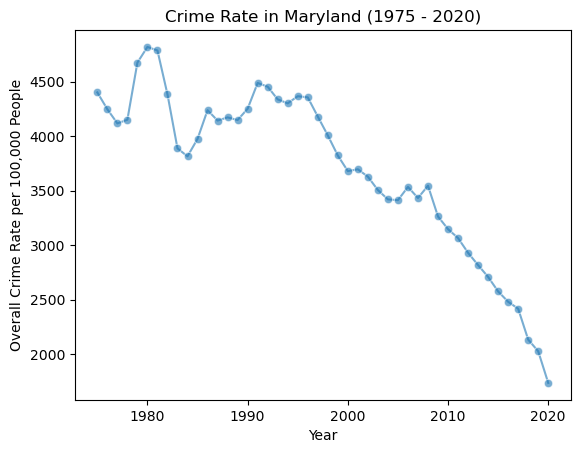

In [9]:
##### creating a line chart to show change in crime rate

sns.lineplot(x = "YEAR", y = "OVERALL CRIME RATE PER 100,000 PEOPLE", data = crime_data,
            errorbar = None, marker = 'o',alpha = 0.6)
plt.title("Crime Rate in Maryland (1975 - 2020)")
plt.xlabel("Year")
plt.ylabel("Overall Crime Rate per 100,000 People")
plt.savefig('line_chart_seaborn.png')
plt.show();

##### From the graph above, we see an upward trend in 1980, and the highest crime ever recorded. And a sigbificant downward trend from 2000

#### Crime Distribution: What are the most common types of crimes committed in Maryland over the years? How has the distribution of different crime types changed over time?

In [10]:
## What are the most common types of crimes committed in Maryland over the years?

# creating a column for crime types
crime_type = ['MURDER', 'RAPE','ROBBERY', 'AGG. ASSAULT',
                'B & E', 'LARCENY THEFT','M/V THEFT'] 
#group by year and sum of occurence
crime_count_year = crime_data.groupby('YEAR')[crime_type].sum()
# count of all crimes by type
total_crime_count = crime_count_year.sum()
# sorting by the most committed crime
total_crime_count.sort_values(ascending = False)



LARCENY THEFT    6137412
B & E            2060512
M/V THEFT        1104976
AGG. ASSAULT      923442
ROBBERY           645167
RAPE               74250
MURDER             21851
dtype: int64

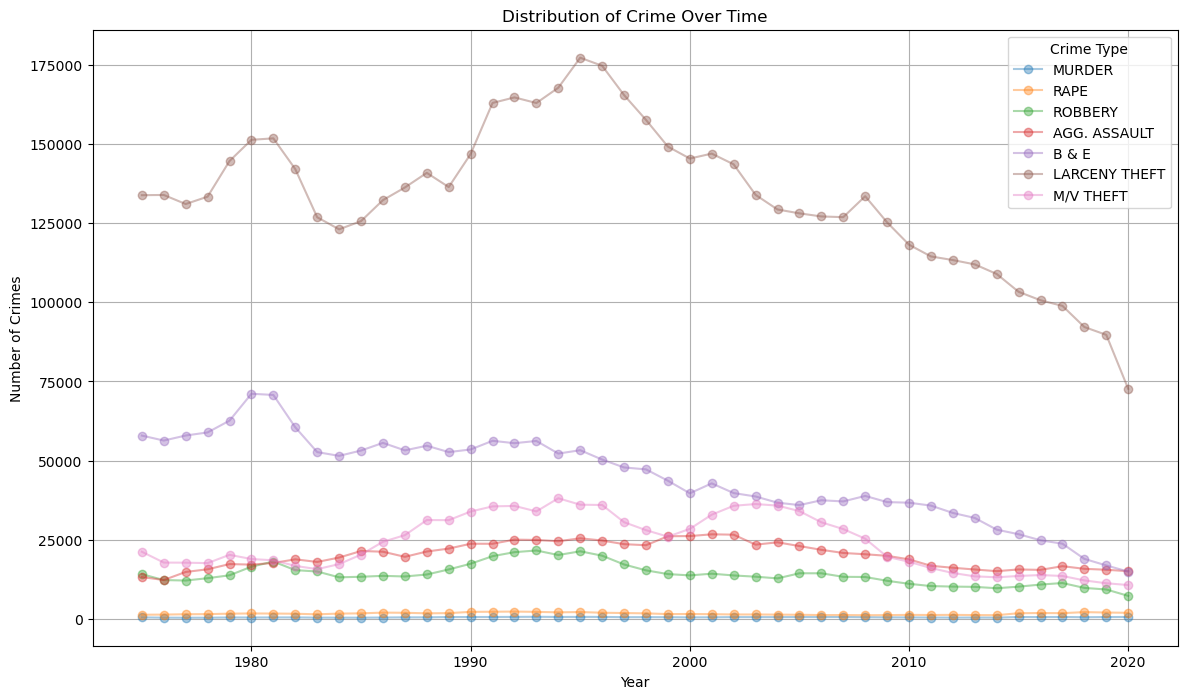

In [11]:
## How has the distribution of different crime types changed over time?

# creating a column for each crime type 
crime_column = ['YEAR','MURDER', 'RAPE','ROBBERY', 'AGG. ASSAULT',
                'B & E', 'LARCENY THEFT','M/V THEFT'] 
# grouping by year
crime_by_year = crime_data[crime_column].groupby('YEAR').sum()

# plotting
plt.figure(figsize=(14, 8))
crime_by_year.plot(kind='line', marker='o', ax=plt.gca(), alpha =0.4)
plt.title('Distribution of Crime Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type')
plt.grid(True)
plt.show()

#### Geographical Analysis: Which jurisdictions have the highest and lowest crime rates? How do these rates compare to the state average?

In [12]:
## Which jurisdictions have the highest and lowest crime rates?

# calculating the average total crime rate by each jurisdiction and sorting from the highest to lowest
crime_rate = crime_data.groupby('JURISDICTION')['OVERALL CRIME RATE PER 100,000 PEOPLE'].mean().sort_values().round(2)

# county with the highest crime rate
highest_crime_rate_jurisdiction = crime_rate.idxmax()
lowest_crime_rate_jurisdiction = crime_rate.idxmin()
highest_crime_rate = crime_rate.max()
lowest_crime_rate = crime_rate.min()
highest_crime_rate_jurisdiction,highest_crime_rate,lowest_crime_rate_jurisdiction,lowest_crime_rate

('Baltimore City', 8673.35, 'Garrett County', 2010.96)

In [13]:
## How do these rates compare to the state average?

# state avaerage crime rate
state_average_crime_rate = crime_data['OVERALL CRIME RATE PER 100,000 PEOPLE'].mean().round(2)
# compare
highest_crime_rate_jurisdiction,highest_crime_rate,state_average_crime_rate,lowest_crime_rate_jurisdiction,lowest_crime_rate,state_average_crime_rate

('Baltimore City', 8673.35, 3688.54, 'Garrett County', 2010.96, 3688.54)

#### Population Correlation: Is there a correlation between population size and crime rates in different jurisdictions? Does a larger population necessarily mean higher crime rates?

In [14]:
## Is there a correlation between population size and crime rates in different jurisdictions

crime_population = crime_data.groupby('JURISDICTION')[['POPULATION', 'OVERALL CRIME RATE PER 100,000 PEOPLE']].mean()

# calculate the correlation coefficient
correlation_coefficient, p_value = pearsonr(crime_population['POPULATION'], crime_population['OVERALL CRIME RATE PER 100,000 PEOPLE'])
print(f'Correlation coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Correlation coefficient: 0.553737373953817
P-value: 0.004996620052718998


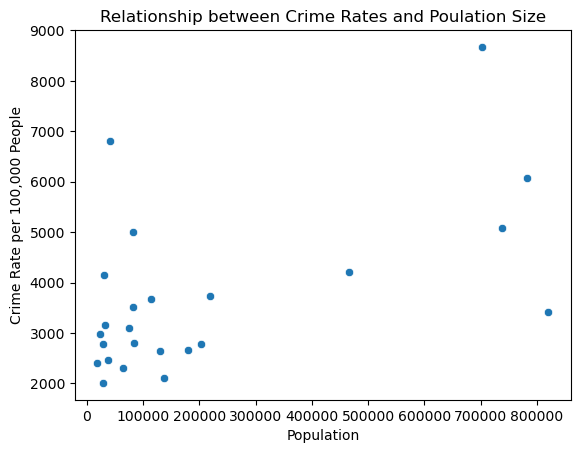

In [15]:
## Does a larger population necessarily mean higher crime rates?

#plotting
sns.scatterplot(x = 'POPULATION', y = 'OVERALL CRIME RATE PER 100,000 PEOPLE', data = crime_population)
plt.title("Relationship between Crime Rates and Poulation Size")
plt.xlabel("Population")
plt.ylabel("Crime Rate per 100,000 People")
plt.show()

##### From the solution above, the correlation coefficient indicates that the populational size are moderately correlated. And the plot above indicates a higher crime rate for a larger population size.

#### Analyze the rate percent change for different crime types. Which crimes have seen the most significant changes (increases or decreases) over the years?

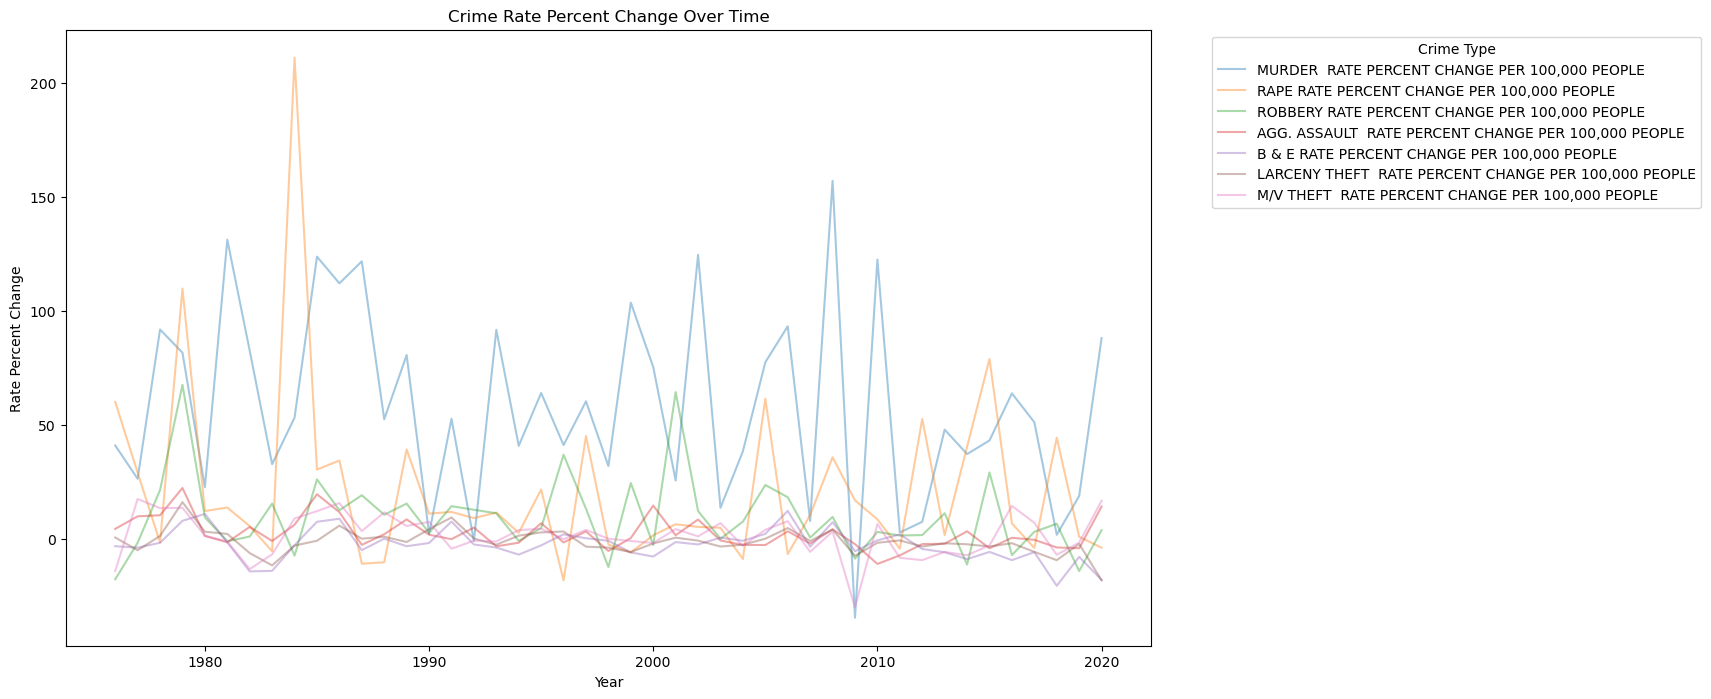

In [16]:
# Extract rate percent change columns
rate_percent_column =['YEAR',
    'MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'B & E RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'M/V THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE']

# filter dataframe for columnc, and calculate the average rate percent change
rate_change_year = crime_data[rate_percent_column].groupby('YEAR').mean()

#plotting
plt.figure(figsize=(14, 8))
rate_change_year.plot(kind='line', ax=plt.gca(), alpha =0.4)
plt.title('Crime Rate Percent Change Over Time')
plt.xlabel('Year')
plt.ylabel('Rate Percent Change')
plt.legend(title='Crime Type',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()

##### Murder and Rape crimes have had the most significant changes over the years

#### Crime Hotspots: Identify crime hotspots. Which areas should be prioritized for increased policing and resource allocation?

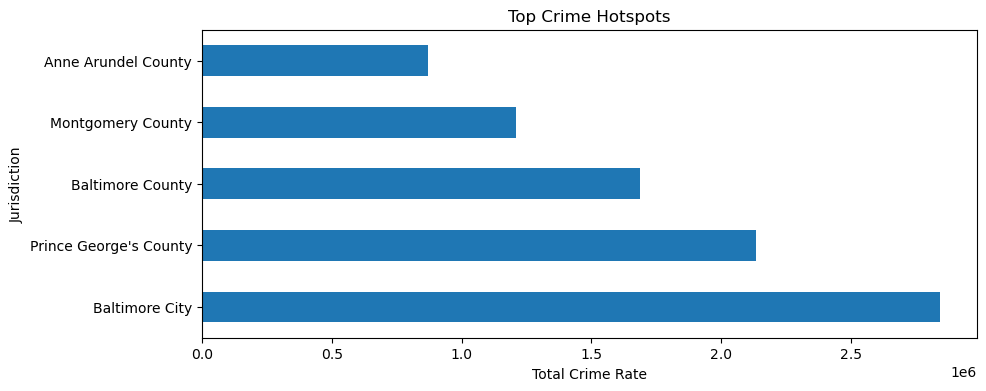

In [17]:
# Group by jurisdiction and calculate total crime by ordering for the highest
total_crime_jurisdiction = crime_data.groupby('JURISDICTION')['GRAND TOTAL'].sum().sort_values(ascending = False)
# top 5 jurisdiction
crime_hotspots = total_crime_jurisdiction.head()
crime_hotspots

# plotting
plt.figure(figsize=(10, 4))
crime_hotspots.plot(kind= 'barh')
plt.title("Top Crime Hotspots")
plt.ylabel("Jurisdiction")
plt.xlabel("Total Crime Rate")
plt.show=()